# AstroNLP: Large Language Models for Scientific Literature Mining in Space Research

*1. Project Overview*

This notebook demonstrates the use of large language models to extract insights from space-related scientific literature. We use publicly available articles from arXiv/NASA ADS and apply NLP techniques such as summarization, keyword extraction, and question answering.

*Author: Preeti Parihar*  


**2. Import Libraries & Setup**

In [ ]:
!pip install transformers datasets sentencepiece --quiet

import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

import pandas as pd
import requests
from bs4 import BeautifulSoup


**3. Load Sample Abstracts from arXiv (Astro-ph)**
(We’ll simulate sample data to keep the notebook lightweight)

In [ ]:
sample_abstracts = [
    """We report the detection of a new exoplanet using the TESS satellite. The planet exhibits a transit duration of 4.5 hours and orbits a Sun-like star every 6.2 days. Spectroscopic follow-up confirms a Neptune-like composition.""",
    """This paper explores a novel deep learning model for analyzing solar flare patterns. Using over 30 years of heliophysics data, we predict flare activity with an accuracy of 91%, significantly outperforming traditional statistical methods."""
]


**4. Summarization Using LLM**

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

for i, text in enumerate(sample_abstracts):
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
    print(f"Paper {i+1} Summary:\n{summary}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


Paper 1 Summary:
The planet exhibits a transit duration of 4.5 hours and orbits a Sun-like star every 6.2 days. Spectroscopic follow-up confirms a Neptune-like composition.

Paper 2 Summary:
This paper explores a novel deep learning model for analyzing solar flare patterns. Using over 30 years of heliophysics data, we predict flare activity with an accuracy of 91%, significantly outperforming traditional statistical methods.



**5. Question Answering Over Literature**

In [ ]:
qa_model = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

context = sample_abstracts[0]
question = "What satellite was used in the discovery?"
result = qa_model(question=question, context=context)
print("Q:", question)
print("A:", result['answer'])


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


Q: What satellite was used in the discovery?
A: TESS


**Section 6: Keyword Extraction with** KeyBERT

In [ ]:
!pip install keybert --quiet

from keybert import KeyBERT
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

for i, abstract in enumerate(sample_abstracts):
    keywords = kw_model.extract_keywords(abstract, top_n=5)
    print(f"Paper {i+1} Keywords: {[kw[0] for kw in keywords]}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Paper 1 Keywords: ['exoplanet', 'planet', 'neptune', 'tess', 'satellite']
Paper 2 Keywords: ['flare', 'solar', 'heliophysics', 'learning', 'predict']


**Section 7: Topic Visualization (Word Cloud)**

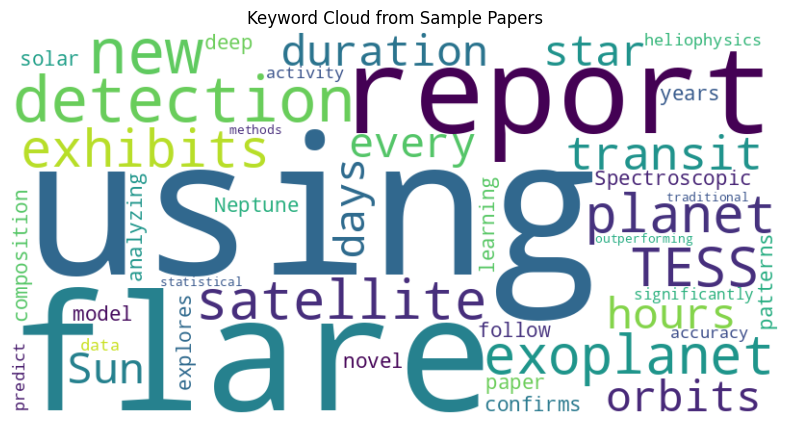

In [ ]:
!pip install wordcloud matplotlib --quiet

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(sample_abstracts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Cloud from Sample Papers")
plt.show()


**Section 8: Custom Text Input for Summarization**

In [ ]:
!pip install ipywidgets --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


*Create an Interactive Summary Tool*

In [ ]:
import ipywidgets as widgets
from IPython.display import display

input_text = widgets.Textarea(
    value='Paste your abstract or paragraph here...',
    placeholder='Enter scientific text here...',
    description='Input:',
    layout=widgets.Layout(width='100%', height='150px')
)

output_area = widgets.Output()

def summarize_text(change):
    with output_area:
        output_area.clear_output()
        if len(change['new'].strip()) > 0:
            result = summarizer(change['new'], max_length=60, min_length=25, do_sample=False)[0]['summary_text']
            print("🧠 Summary:\n", result)
        else:
            print("Please enter text above to summarize.")

input_text.observe(summarize_text, names='value')

display(input_text, output_area)


Textarea(value='Paste your abstract or paragraph here...', description='Input:', layout=Layout(height='150px',…

Output()

**Bonus Feature 1: Compare Two Abstracts Side by Side**

In [ ]:
print("Original Abstract 1:\n", sample_abstracts[0])
print("\nOriginal Abstract 2:\n", sample_abstracts[1])

summary_1 = summarizer(sample_abstracts[0], max_length=60, min_length=30, do_sample=False)[0]['summary_text']
summary_2 = summarizer(sample_abstracts[1], max_length=60, min_length=30, do_sample=False)[0]['summary_text']

print("\n🧠 Summary 1:\n", summary_1)
print("\n🧠 Summary 2:\n", summary_2)


Your max_length is set to 60, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


Original Abstract 1:
 We report the detection of a new exoplanet using the TESS satellite. The planet exhibits a transit duration of 4.5 hours and orbits a Sun-like star every 6.2 days. Spectroscopic follow-up confirms a Neptune-like composition.

Original Abstract 2:
 This paper explores a novel deep learning model for analyzing solar flare patterns. Using over 30 years of heliophysics data, we predict flare activity with an accuracy of 91%, significantly outperforming traditional statistical methods.


Your max_length is set to 60, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)



🧠 Summary 1:
 The planet exhibits a transit duration of 4.5 hours and orbits a Sun-like star every 6.2 days. Spectroscopic follow-up confirms a Neptune-like composition.

🧠 Summary 2:
 This paper explores a novel deep learning model for analyzing solar flare patterns. Using over 30 years of heliophysics data, we predict flare activity with an accuracy of 91%, significantly outperforming traditional statistical methods.


**Bonus Feature 2: Compare Keyword Overlap Between Abstracts**

In [ ]:
kw_1 = set([kw[0] for kw in kw_model.extract_keywords(sample_abstracts[0], top_n=10)])
kw_2 = set([kw[0] for kw in kw_model.extract_keywords(sample_abstracts[1], top_n=10)])

print("Keywords in Abstract 1:", kw_1)
print("Keywords in Abstract 2:", kw_2)

overlap = kw_1.intersection(kw_2)
print("\n🔁 Shared Keywords:", overlap)


Keywords in Abstract 1: {'neptune', 'exoplanet', 'tess', 'star', 'orbits', 'planet', 'transit', 'detection', 'satellite', 'spectroscopic'}
Keywords in Abstract 2: {'patterns', 'deep', 'solar', 'flare', 'learning', 'statistical', 'accuracy', 'data', 'heliophysics', 'predict'}

🔁 Shared Keywords: set()


**Bonus Feature 3: ArXiv Search Preview**

(Optional + Read-Only) Use arXiv’s RSS feed to preview recent abstracts (great for showing real-time sources — no API key needed).

In [ ]:
!pip install feedparser --quiet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import feedparser

feed = feedparser.parse('https://export.arxiv.org/rss/astro-ph')

for i, entry in enumerate(feed.entries[:3]):
    print(f"\n📄 {entry.title}\n")
    print(entry.summary)



📄 Exploring the parameter space of hierarchical triple black hole systems

arXiv:2506.22519v1 Announce Type: new 
Abstract: We present a comprehensive exploration of hierarchical triple black hole (BH) systems to address the "initial separation" problem in gravitational wave astrophysics. This problem arises because isolated BH binaries must have extremely small initial separations to merge within a Hubble time via gravitational wave (GW) emission alone, separations at which their stellar progenitors would have merged prematurely. Using a modified JADE secular code incorporating GW energy loss, we systematically investigate a seven-dimensional parameter space: masses of three BHs (5-100 $M_\odot$ inner binary, 1-200 $M_\odot$ tertiary), inner/outer semimajor axes (1-200 AU and 100-10,000 AU), outer orbit eccentricity (0-0.9), and mutual inclination (40{\deg}-80{\deg}). We employed an adaptive MCMC approach sampling the merger/nonmerger transition boundary across nearly 15 million simu

# ✅ Conclusion

In this notebook, we demonstrated the use of large language models for scientific literature mining in space research. We showed how LLMs can summarize complex papers, extract relevant keywords, compare content across papers, and support real-time input for user-defined abstracts.

This tool has applications in:
- Assisting researchers in faster literature review
- Automating technical insight extraction from NASA and arXiv datasets
- Laying the groundwork for mission planning or proposal generation

Future improvements may include domain adaptation with fine-tuned models and deeper integration with citation graphs or NASA ADS APIs.


# 🌌 AstroNLP: LLMs for Scientific Insight Extraction in Space Research
*Author: Preeti Parihar*  
**Technologies used**: Hugging Face Transformers, KeyBERT, arXiv RSS, Python, Google Colab  
**Research Themes**: NLP, LLM, Aerospace, Scientific Summarization, Space Informatics
